In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as plticker

In [128]:
sales_data = pd.read_csv('sales_05_8.csv')
sales_data.shape

(75087, 6)

In [129]:
len(sales_data['ID'].unique())


52672

In [130]:
sales_data['Now'] = '2022-06-10'
sales_data['Now'] = pd.to_datetime(sales_data['Now'])
sales_data['Time_stamp'] = pd.to_datetime(sales_data['Time_stamp'])
sales_data = sales_data[sales_data['Status'] == 'purchase']
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


In [131]:
sales_data['Interval'] = sales_data['Now'] - sales_data['Time_stamp']
sales_data.head(5)

,Install,Time_stamp,Status,ID,Payment,Game_Name,Now,Interval
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager,2022-06-10,134 days
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground,2022-06-10,89 days
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager,2022-06-10,111 days
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground,2022-06-10,105 days
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager,2022-06-10,92 days


In [132]:
RFM_data = sales_data.groupby(['ID']).agg({'Interval':'min','ID': 'count', 'Payment': 'sum'})
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900
...,...,...,...
Zachary_937,101 days,4,11600
Zachary_948,48 days,5,26500
Zoe_163,11 days,5,105500


In [133]:
RFM_data['Recency'] = RFM_data['Recency'].dt.days


In [134]:
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60,5,40500
Aaron_031,102,5,17500
Aaron_077,40,4,26600
Aaron_165,21,4,49600
Aaron_224,108,1,900
...,...,...,...
Zachary_937,101,4,11600
Zachary_948,48,5,26500
Zoe_163,11,5,105500


In [135]:
RFM_data['Recency'].dtype


dtype('int64')

In [136]:
RFM_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,5267.0,66.52,35.68,7.0,36.0,61.0,94.0,158.0
Frequency,5267.0,5.26,7.00,1.0,1.0,5.0,5.0,37.0
Monetary,5267.0,50340.00,73012.36,900.0,9900.0,29900.0,55500.0,582700.0


In [137]:
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (100, 1)).round(2)
RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (100,1)).round(2)

In [138]:
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)
RFM_data.head(10)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
ID,,,,,,,
Aaron_027,60,5,40500,65.25,89.00,93.26,82.50
Aaron_031,102,5,17500,37.72,89.00,97.18,74.63
Aaron_077,40,4,26600,78.36,91.75,95.63,88.58
Aaron_165,21,4,49600,90.82,91.75,91.71,91.43
Aaron_224,108,1,900,33.78,100.00,100.00,77.93
Aaron_280,138,1,4900,14.11,100.00,99.32,71.14
Aaron_380,13,5,35500,96.07,89.00,94.11,93.06
Aaron_457,32,5,31500,83.61,89.00,94.79,89.13
Aaron_461,30,1,900,84.92,100.00,100.00,94.97


In [139]:
RFM_data['Class'] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])
RFM_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
ID,,,,,,,,
Aaron_027,60,5,40500,65.25,89.00,93.26,82.50,4
Aaron_031,102,5,17500,37.72,89.00,97.18,74.63,5
Aaron_077,40,4,26600,78.36,91.75,95.63,88.58,3
Aaron_165,21,4,49600,90.82,91.75,91.71,91.43,2
Aaron_224,108,1,900,33.78,100.00,100.00,77.93,5
...,...,...,...,...,...,...,...,...
Zachary_937,101,4,11600,38.37,91.75,98.18,76.10,5
Zachary_948,48,5,26500,73.12,89.00,95.64,85.92,4
Zoe_163,11,5,105500,97.38,89.00,82.20,89.53,3


In [140]:
RFM_data.reset_index(inplace=True)
# inplace = true: modify the current df, if false: create a new df 
RFM_data.columns

Index(['ID', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score',
       'M_score', 'RFM_score', 'Class'],
      dtype='object')

In [141]:
temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()
temp_var

Class
5    2107
4    1320
3    1050
2     737
1      53
Name: ID, dtype: int64

In [142]:
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=False)
temp_var = temp_var.rename(columns = {'index':'Class'})
temp_var

,Class,ID
0,5,2107
1,4,1320
2,3,1050
3,2,737
4,1,53


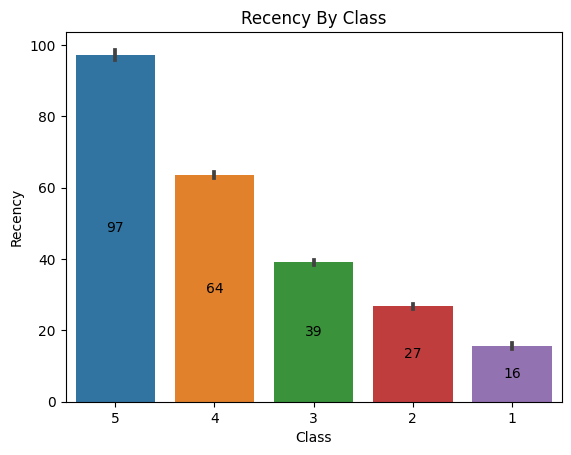

In [143]:
ax = sns.barplot(data=RFM_data, x='Class', y='Recency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Recency By Class')
plt.show()

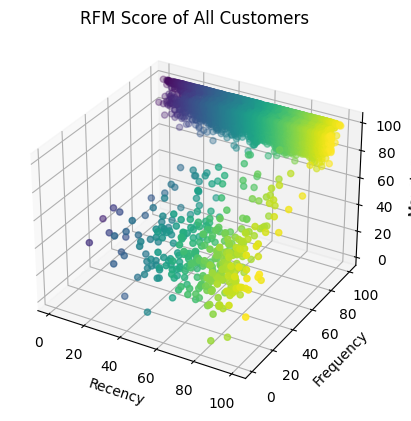

In [144]:
# 필요한 라이브러리를 호출합니다. 
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()

In [154]:
test = RFM_data[['R_score','F_score', 'M_score', 'Class']]
test.set_index('Class', inplace=True)
test
df = pd.DataFrame(test)
df

,R_score,F_score,M_score
Class,,,
4,65.25,89.00,93.26
5,37.72,89.00,97.18
3,78.36,91.75,95.63
2,90.82,91.75,91.71
5,33.78,100.00,100.00
...,...,...,...
5,38.37,91.75,98.18
4,73.12,89.00,95.64
3,97.38,89.00,82.20


In [148]:
import math 
from math import pi


In [159]:

categories = list(df.columns)
N = len(categories)

# What will be the angle of each axis in the plot?
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first axis to close the circle


fig, ax = plt.subplots(figsize=(2, 2), subplot_kw=dict(polar=True))

for index, row in df.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=f'Class {index}')

# Add labels
# ax.set_yticklabels([])
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(categories)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.show()

ValueError: Image size of 249x110371 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 200x200 with 1 Axes>